## Email span detection using Convolutional Neural Networks(CNN) with Sequential API 


# Variant 3: CNN with Bidirectional LSTM and GlobalMaxPooling1D


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Bidirectional, Dropout, LSTM
from tensorflow.keras.optimizers import SGD, Adam, RMSprop


### STEP 0: Preprocessing Data

In [14]:

# Step 1: Load the dataset
data = pd.read_csv('test_data.csv')

# Convert text in 'message' column to lowercase
data['Message'] = data['Message'].apply(lambda x: x.lower())


### STEP 1: Data Splitting

In [15]:

#LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#Assign 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=30)


print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (4457,), Training labels shape: (4457,)
Test data shape: (1115,), Test labels shape: (1115,)


### STEP 2: Model Architecture Design

In [16]:


# Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5


#This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation='relu'),
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM Layer
    GlobalMaxPooling1D(),  # Apply GlobalMaxPooling1D after LSTM
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### STEP 3: Model Compilation

In [17]:


# Step 6: Train the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])


### STEP 4: Model Training

In [18]:
  
epochs = 5
batch_size = 64
#epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.8352 - loss: 0.4884 - val_accuracy: 0.9785 - val_loss: 0.0877
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9851 - loss: 0.0646 - val_accuracy: 0.9865 - val_loss: 0.0428
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9894 - loss: 0.0437 - val_accuracy: 0.9830 - val_loss: 0.0581
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9954 - loss: 0.0203 - val_accuracy: 0.9874 - val_loss: 0.0405
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9976 - loss: 0.0154 - val_accuracy: 0.9874 - val_loss: 0.0500


In [19]:
import matplotlib.pyplot as plt

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


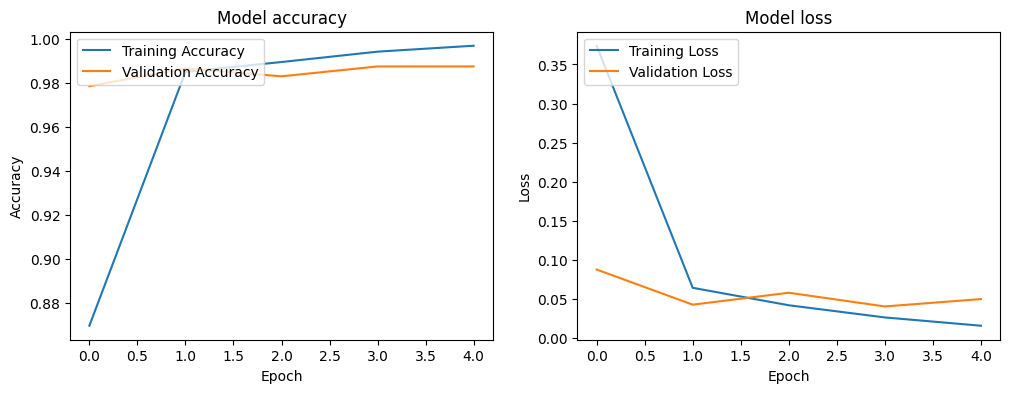

In [20]:
def plot_model_history(history):
    # values to plot
    #  loss: loss value for training data
    #  accuracy: accuracy value for training data
    #  val_loss: loss value for validation data
    #  val_accuracy: accuracy value for validation data
    print(history.history.keys())

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
    plt.show()

plot_model_history(history)

## Predict Single Input

In [21]:
# Example of spam or ham prediction
def predict_spam_or_ham(message):
    # Tokenize and pad the input message
    message_seq = tokenizer.texts_to_sequences([message])
    message_pad = pad_sequences(message_seq, maxlen=max_len)
    
    # Make predictions
    prediction = model.predict(message_pad)
    
    print(prediction)
    # Convert prediction to label (0 for ham, 1 for spam)
    label = "spam" if prediction[0][0] > 0.5 else "ham"
    
    return label


In [22]:

# Example message
example_message = "Congratulations! You've won a free trip to Hawaii. Claim your prize now!"

# Predict if the message is spam or ham
prediction = predict_spam_or_ham(example_message)
print("Predicted Label:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9999558]]
Predicted Label: spam


In [23]:

# Example message
example_message = "This email provides relevant information about an upcoming programming workshop and encourages the recipient to RSVP if interested. It does not contain any elements typically associated with spam, such as unsolicited offers, suspicious links, or irrelevant content."

# Predict if the message is spam or ham
prediction = predict_spam_or_ham(example_message)
print("Predicted Label:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[0.08171053]]
Predicted Label: ham


# Performance Analysis

## Model Evaluation

1. **Accuracy**: Measure the overall accuracy of the model on the test dataset.


In [24]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9884 - loss: 0.0531
Test Accuracy: 0.9874439239501953


2. **Precision**: Evaluate how many of the predicted positives are actual positives.


In [25]:

from sklearn.metrics import precision_score

In [26]:

# Predict probabilities ( the output is in probability, bacuse we use a sigmoid activation function in the final layer of your neural network, which outputs probabilities between 0 and 1.)
y_pred_prob = model.predict(X_test_pad)


#note that common threshold value is 0.5
# Convert probabilities to binary class labels
y_pred = (y_pred_prob > 0.5).astype(int)


# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Precision: 0.98


3. **Recall**: Determine how many of the actual positives are correctly identified by the model.


In [27]:
from sklearn.metrics import recall_score


In [28]:

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

Recall: 0.92


4. **F1 Score**: Calculate the harmonic mean of precision and recall to get a single performance metric.


In [29]:
from sklearn.metrics import f1_score


In [30]:

# Assuming y_true and y_pred are the true labels and predicted labels, respectively
# Calculate F1 score
f1 = f1_score(y_pred, y_pred)

print(f'F1 Score: {f1:.2f}')

F1 Score: 1.00


5. **ROC Curve**: The Receiver Operating Characteristic (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
The Area Under the ROC Curve (AUC-ROC) quantifies the performance of the model across all possible classification thresholds. A higher AUC-ROC value indicates better discrimination between spam and non-spam classes.

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


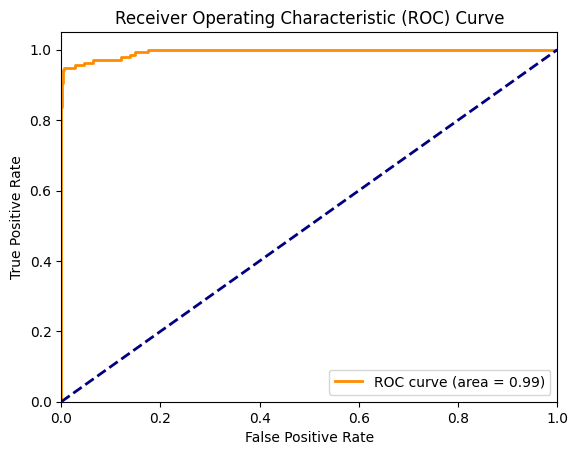

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 9: Make predictions on the test set
y_pred_prob = model.predict(X_test_pad)

# Step 10: Compute ROC curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Step 11: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

6. **Confusion Matrix**: Analyze the confusion matrix to understand the true positives, false positives, true negatives, and false negatives.


In [32]:
from sklearn.metrics import confusion_matrix


In [33]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[976   3]
 [ 11 125]]


plot confusion matrix

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

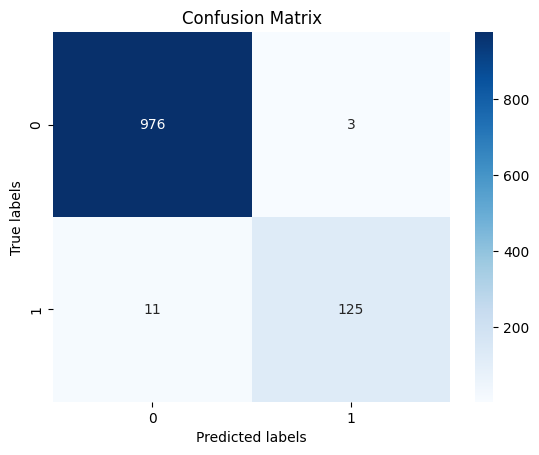

In [35]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Resource Utilization


1. **Training Time**: Measure the time taken to train the model.

In [36]:
import time

In [37]:

# Measure the training time
start_time = time.time()

# Train the model
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9981 - loss: 0.0109 - val_accuracy: 0.9857 - val_loss: 0.0470
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9971 - loss: 0.0088 - val_accuracy: 0.9803 - val_loss: 0.0682
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.9950 - loss: 0.0194 - val_accuracy: 0.9848 - val_loss: 0.0758
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9987 - loss: 0.0060 - val_accuracy: 0.9857 - val_loss: 0.0708
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.9985 - loss: 0.0035 - val_accuracy: 0.9848 - val_loss: 0.0860
Training time: 32.97 seconds


2. **Inference Time**: Check the time taken for the model to make predictions.


In [38]:

# Measure inference time
start_time = time.time()
y_pred_prob = model.predict(X_test_pad)
end_time = time.time()
inference_time = end_time - start_time
print(f'Inference Time: {inference_time:.4f} seconds')


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Inference Time: 0.8323 seconds



## Hyperparameter Tuning


1. **Learning Rate**: Optimize and analyze the effect of different learning rates.

In [39]:

#This line initializes a new instance of the LabelEncoder class. LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#The transformed numerical labels are then assigned back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)
# Step 3: Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5

# Define a list of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1, 0.3]

# Train models with different learning rates and evaluate their performance
for lr in learning_rates:
    #This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API
        
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation='relu'),
        Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM Layer
        GlobalMaxPooling1D(),  # Apply GlobalMaxPooling1D after LSTM
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])


    # Compile the model with the specified learning rate
    optimizer = Adam(learning_rate=lr)
    
    # Step 6: Train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        
    epochs = 5
    #epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

    history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
    y_pred_prob = model.predict(X_test_pad)
    y_pred = (y_pred_prob > 0.5).astype(int)
    precision = precision_score(y_test, y_pred)
    
    print(f"Accuracy with learning rate {lr}: {accuracy:.4f}")
    print(f"Precision with learning rate {lr}: {precision:.4f}")
    print("-----------------------------------")

    

Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.8369 - loss: 0.4645 - val_accuracy: 0.9803 - val_loss: 0.0828
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9845 - loss: 0.0733 - val_accuracy: 0.9892 - val_loss: 0.0473
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9911 - loss: 0.0368 - val_accuracy: 0.9883 - val_loss: 0.0488
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9961 - loss: 0.0153 - val_accuracy: 0.9892 - val_loss: 0.0441
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9971 - loss: 0.0143 - val_accuracy: 0.9865 - val_loss: 0.0492
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Accuracy with learning rate 0.001: 0.9865
Precision with learning rate 0.001: 0.9589
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8401 - loss: 0.4550 - val_accuracy: 0.9803 - val_loss: 0.0740
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9844 - loss: 0.0601 - val_accuracy: 0.9848 - val_loss: 0.0553
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.9910 - loss: 0.0418 - val_accuracy: 0.9865 - val_loss: 0.0544
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9948 - loss: 0.0286 - val_accuracy: 0.9874 - val_loss: 0.0620
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.9985 - loss: 0.0091 - val_accuracy: 0.9839 - val_loss: 0.0644
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
Accuracy with learning rate 0.01: 0.9839
Precision with learning rate 0.01: 0.9396
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.8176 - loss: 0.5009 - val_accuracy: 0.9758 - val_loss: 0.1233
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9806 - loss: 0.0870 - val_accuracy: 0.9901 - val_loss: 0.0473
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9858 - loss: 0.0510 - val_accuracy: 0.9883 - val_loss: 0.0507
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9956 - loss: 0.0228 - val_accuracy: 0.9874 - val_loss: 0.0506
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9965 - loss: 0.0171 - val_accuracy: 0.9668 - val_loss: 0.0943
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Accuracy with learning rate 0.1: 0.9668
Precision with learning rate 0.1: 0.8218
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.8349 - loss: 0.4690 - val_accuracy: 0.9749 - val_loss: 0.1068
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9811 - loss: 0.0790 - val_accuracy: 0.9830 - val_loss: 0.0596
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9884 - loss: 0.0408 - val_accuracy: 0.9857 - val_loss: 0.0538
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9892 - val_loss: 0.0461
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9959 - loss: 0.0140 - val_accuracy: 0.9883 - val_loss: 0.0503
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Accuracy with learning rate 0.3: 0.9883
Precision with learning rate 0.3: 0.9789
-----------------------------------


2. **Batch Size**: Experiment with different batch sizes to find the optimal one.
    

In [40]:
#Note: added the above implementation together into single unit, and exicuted it with different batch_size

#This line initializes a new instance of the LabelEncoder class. LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#The transformed numerical labels are then assigned back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)
# Step 3: Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5


# Experiment with different batch sizes
batch_sizes = [16, 32, 64, 128]
#batch_size determines the number of samples per gradient update during training. In each iteration, the model will process and update weights based on 64 samples.
for batch_size in batch_sizes:
    #This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API
        
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation='relu'),
        Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM Layer
        GlobalMaxPooling1D(),  # Apply GlobalMaxPooling1D after LSTM
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    # Step 6: Train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        
    epochs = 5
    #epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

    history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

    # Predict probabilities
    y_pred_prob = model.predict(X_test_pad)

    # Convert probabilities to binary class labels
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
     # Evaluate the model
    loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)

    print(f'Precision with batch size {batch_size}: {precision:.2f}')
    print(f"Accuracy with batch size {batch_size}: {accuracy:.4f}")
    print("-----------------------------------")

    

Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


279/279 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.8973 - loss: 0.3236 - val_accuracy: 0.9803 - val_loss: 0.0624
Epoch 2/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9872 - loss: 0.0538 - val_accuracy: 0.9901 - val_loss: 0.0419
Epoch 3/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.9955 - loss: 0.0207 - val_accuracy: 0.9857 - val_loss: 0.0658
Epoch 4/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9977 - loss: 0.0092 - val_accuracy: 0.9865 - val_loss: 0.0504
Epoch 5/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9984 - loss: 0.0082 - val_accuracy: 0.9794 - val_loss: 0.0799
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Precision with batch size 16: 0.90
Accuracy with batch size 16: 0.9794
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.8545 - loss: 0.4270 - val_accuracy: 0.9857 - val_loss: 0.0545
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9853 - loss: 0.0612 - val_accuracy: 0.9892 - val_loss: 0.0483
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.9942 - loss: 0.0254 - val_accuracy: 0.9883 - val_loss: 0.0529
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9972 - loss: 0.0137 - val_accuracy: 0.9865 - val_loss: 0.0540
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.9981 - loss: 0.0131 - val_accuracy: 0.9857 - val_loss: 0.0627
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step
Precision with batch size 32: 0.96
Accuracy with batch size 32: 0.9857
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - accuracy: 0.8463 - loss: 0.4767 - val_accuracy: 0.9695 - val_loss: 0.1526
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9779 - loss: 0.1010 - val_accuracy: 0.9892 - val_loss: 0.0454
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9903 - loss: 0.0385 - val_accuracy: 0.9874 - val_loss: 0.0494
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9966 - loss: 0.0230 - val_accuracy: 0.9883 - val_loss: 0.0567
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9962 - loss: 0.0141 - val_accuracy: 0.9830 - val_loss: 0.0724
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Precision with batch size 64: 0.93
Accuracy with batch size 64: 0.9830
-----------------------------------
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 206ms/step - accuracy: 0.8254 - loss: 0.5074 - val_accuracy: 0.8664 - val_loss: 0.3624
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - accuracy: 0.8987 - loss: 0.2643 - val_accuracy: 0.9857 - val_loss: 0.0589
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - accuracy: 0.9877 - loss: 0.0530 - val_accuracy: 0.9892 - val_loss: 0.0431
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.9912 - loss: 0.0328 - val_accuracy: 0.9874 - val_loss: 0.0456
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - accuracy: 0.9953 - loss: 0.0196 - val_accuracy: 0.9892 - val_loss: 0.0465
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
Precision with batch size 128: 0.98
Accuracy with batch size 128: 0.9892
-----------------------------------


3. **Optimizer Choice**: Compare the performance of different optimizers (SGD, Adam, RMSprop, etc.).


In [41]:

#This line initializes a new instance of the LabelEncoder class. LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#The transformed numerical labels are then assigned back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)
# Step 3: Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5


# Define a list of optimizers to compare
optimizers = [SGD(), Adam(), RMSprop()]

# Iterate over each optimizer
for optimizer in optimizers:
    #This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API
        
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation='relu'),
        Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM Layer
        GlobalMaxPooling1D(),  # Apply GlobalMaxPooling1D after LSTM
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    # Step 6: Train the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        
    epochs = 5
    #epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

    history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

# Predict probabilities
    y_pred_prob = model.predict(X_test_pad)

    # Convert probabilities to binary class labels
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate precision
    precision = precision_score(y_test, y_pred,zero_division=1)
     # Evaluate the model
    loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)

    print(f'Precision with Optimizer {optimizer.__class__.__name__}: {precision:.2f}')
    print(f"Accuracy with Optimizer {optimizer.__class__.__name__}: {accuracy:.4f}")
    

Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 326ms/step - accuracy: 0.8559 - loss: 0.6623 - val_accuracy: 0.8664 - val_loss: 0.5892
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - accuracy: 0.8675 - loss: 0.5700 - val_accuracy: 0.8664 - val_loss: 0.5194
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.8691 - loss: 0.5051 - val_accuracy: 0.8664 - val_loss: 0.4712
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.8600 - loss: 0.4707 - val_accuracy: 0.8664 - val_loss: 0.4387
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 308ms/step - accuracy: 0.8657 - loss: 0.4356 - val_accuracy: 0.8664 - val_loss: 0.4188
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
Precision with Optimizer SGD: 1.00
Accuracy with Optimizer SGD: 0.8664
Epoch 1/5


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step - accuracy: 0.8464 - loss: 0.5014 - val_accuracy: 0.8664 - val_loss: 0.3485
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - accuracy: 0.9098 - loss: 0.2300 - val_accuracy: 0.9874 - val_loss: 0.0544
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.9824 - loss: 0.0573 - val_accuracy: 0.9857 - val_loss: 0.0511
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 508ms/step - accuracy: 0.9919 - loss: 0.0365 - val_accuracy: 0.9883 - val_loss: 0.0504
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 504ms/step - accuracy: 0.9964 - loss: 0.0187 - val_accuracy: 0.9874 - val_loss: 0.0527
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step
Precision with Optimizer Adam: 0.97
Accuracy with Optimizer Adam: 0.9874


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 491ms/step - accuracy: 0.8288 - loss: 0.4682 - val_accuracy: 0.8664 - val_loss: 0.3865
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - accuracy: 0.8610 - loss: 0.3901 - val_accuracy: 0.8664 - val_loss: 0.2562
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 458ms/step - accuracy: 0.9314 - loss: 0.1907 - val_accuracy: 0.9785 - val_loss: 0.0703
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 452ms/step - accuracy: 0.9829 - loss: 0.0641 - val_accuracy: 0.9821 - val_loss: 0.0618
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 430ms/step - accuracy: 0.9854 - loss: 0.0570 - val_accuracy: 0.9857 - val_loss: 0.0523
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step
Precision with Optimizer RMSprop: 0.97
Accuracy with Optimizer RMSprop: 0.9857


4. ***DIfferent Activation Functions***

In [42]:

#This line initializes a new instance of the LabelEncoder class. LabelEncoder is a utility class in scikit-learn that converts categorical labels into numerical labels.
label_encoder = LabelEncoder()
#The transformed numerical labels are then assigned back to the 'Category' column in the data DataFrame.
data['Category'] = label_encoder.fit_transform(data['Category'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)
# Step 3: Tokenize the text data
max_words = 1000 # max_words is a variable that determines the maximum number of unique words to be considered in the tokenizer. In this case, it's set to 1000, meaning only the top 1000 most frequent words will be considered.

tokenizer = Tokenizer(num_words=max_words) #Tokenizer is a class from the Keras library used for tokenizing text data.
#num_words is a parameter that specifies the maximum number of words to keep, based on word frequency. Words outside this limit will be ignored. Here, it's set to max_words, so only the top 1000 most frequent words will be kept.

tokenizer.fit_on_texts(X_train)
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Step 4: Pad sequences to ensure uniform length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Step 5: Build the CNN model
embedding_dim = 50
num_filters = 64
filter_size = 5


batch_size = 64

# Activation functions to test
activation_functions = ['relu', 'tanh', 'sigmoid', 'elu']

# Iterate over each optimizer
for activation in activation_functions:
    #This code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API
      
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Conv1D(filters=num_filters, kernel_size=filter_size, padding='same', activation=activation),
        Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM Layer
        GlobalMaxPooling1D(),  # Apply GlobalMaxPooling1D after LSTM
        Dense(128, activation=activation),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Step 6: Train the model
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

        
    epochs = 5
    #epochs specifies the number of epochs (iterations over the entire dataset) for training the model. Here, the model will be trained for 5 epochs.

    history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))
    
    # Predict probabilities
    y_pred_prob = model.predict(X_test_pad)

    # Convert probabilities to binary class labels
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
     # Evaluate the model
    loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)

    print(f'Precision with Activation: {activation}: {precision:.2f}')
    print(f"Accuracy with Activation: {activation}: {accuracy:.4f}")
    

    

c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - accuracy: 0.8319 - loss: 0.4735 - val_accuracy: 0.9821 - val_loss: 0.0658
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9830 - loss: 0.0784 - val_accuracy: 0.9874 - val_loss: 0.0490
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.9904 - loss: 0.0404 - val_accuracy: 0.9857 - val_loss: 0.0481
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.9956 - loss: 0.0235 - val_accuracy: 0.9883 - val_loss: 0.0472
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.9967 - loss: 0.0161 - val_accuracy: 0.9839 - val_loss: 0.0586
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step
Precision with Activation: relu: 0.93
Accuracy with Activation: relu: 0.9839


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 229ms/step - accuracy: 0.8419 - loss: 0.4272 - val_accuracy: 0.9830 - val_loss: 0.0607
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.9884 - loss: 0.0419 - val_accuracy: 0.9892 - val_loss: 0.0469
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.9925 - loss: 0.0283 - val_accuracy: 0.9901 - val_loss: 0.0462
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.9977 - loss: 0.0165 - val_accuracy: 0.9874 - val_loss: 0.0478
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.9979 - loss: 0.0108 - val_accuracy: 0.9857 - val_loss: 0.0568
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step
Precision with Activation: tanh: 0.97
Accuracy with Activation: tanh: 0.9857


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 212ms/step - accuracy: 0.7160 - loss: 0.5764 - val_accuracy: 0.8664 - val_loss: 0.3918
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - accuracy: 0.8673 - loss: 0.3927 - val_accuracy: 0.9857 - val_loss: 0.1206
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - accuracy: 0.9799 - loss: 0.0997 - val_accuracy: 0.9910 - val_loss: 0.0456
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.9901 - loss: 0.0465 - val_accuracy: 0.9910 - val_loss: 0.0441
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.9932 - loss: 0.0310 - val_accuracy: 0.9821 - val_loss: 0.0671
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step
Precision with Activation: sigmoid: 0.99
Accuracy with Activation: sigmoid: 0.9821


c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_CNN\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.8538 - loss: 0.4280 - val_accuracy: 0.9874 - val_loss: 0.0554
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.9802 - loss: 0.0683 - val_accuracy: 0.9874 - val_loss: 0.0484
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.9945 - loss: 0.0280 - val_accuracy: 0.9874 - val_loss: 0.0499
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.9952 - loss: 0.0158 - val_accuracy: 0.9874 - val_loss: 0.0484
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - accuracy: 0.9948 - loss: 0.0203 - val_accuracy: 0.9830 - val_loss: 0.0644
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step
Precision with Activation: elu: 0.95
Accuracy with Activation: elu: 0.9830
